<h1 style="color:cornflowerblue">Objectives</h1>
<p>For this case, consider that the current company is releasing a new vehicle (minivan), the company wants to get information on its best target public.</p>
<p>This study aims on the segmentation of the clients database for personalized marketing campaigns.</p>
<p>The segmentation seeks to obtain the "desires and needs" of these groups of customers.</p>
<p>Also, checking the if the evaluation of the product is related do demographic information, and if so, what group of clients should be the target of this product.</p>


<h1 style="color:cornflowerblue">Importing Libraries</h1>

In [1]:
# System
import os

# Data Manipulation
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [2]:
# Configuring Pandas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Cientific notation to float.

<h1 style="color:cornflowerblue">Dataframe</h1>

In [3]:
# Importing data

df0 = pd.read_csv("./data/microvan.csv")
df0.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [4]:
# Checking Columns

df0.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

In [5]:
# Checking Dataframe shape

df0.shape

(400, 39)

In [6]:
for i in df0.columns:
    print(df0[i].value_counts(dropna=False))
    print("\n")

subjnumb
1      1
264    1
274    1
273    1
272    1
271    1
270    1
269    1
268    1
267    1
266    1
265    1
263    1
2      1
262    1
261    1
260    1
259    1
258    1
257    1
256    1
255    1
254    1
253    1
275    1
276    1
277    1
278    1
299    1
298    1
297    1
296    1
295    1
294    1
293    1
292    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
280    1
279    1
252    1
251    1
250    1
225    1
223    1
222    1
221    1
220    1
219    1
218    1
217    1
216    1
215    1
214    1
213    1
212    1
211    1
210    1
209    1
208    1
207    1
206    1
205    1
204    1
203    1
224    1
226    1
249    1
227    1
248    1
247    1
246    1
245    1
244    1
243    1
242    1
241    1
240    1
239    1
238    1
237    1
236    1
235    1
234    1
233    1
232    1
231    1
230    1
229    1
228    1
300    1
301    1
302    1
376    1
374    1
373    1
372    1
371    1
370    1
369    1
368    1
3

<h2 style="color:cornflowerblue">Columns and Stored Data</h2>
<p>The Dataframe is based on the answers of possible clients on the concept of a new product.</p>
<p>The subjnumb columns refers to the subjected answer and will become the index of the dataframe;</p>
<p>Except for the demographic columns (age, income, miles, numkids, female, educ and recycle), they all are ordinal answers from 1 to 9. For the sake of understanding what each column represents, a dictionary of values will be created.</p>

In [7]:
# Dictionary of data

data_dict = {
    "subjnumb": "Respondee Identifier",
    "mvliking": "General evaluation of the product concept. From 1 to 9",
    "kidtrans": "Evaluation of the need to transport kids. From 1 to 9",
    "miniboxy": "Evaluation of space and design. From 1 to 9",
    "lthrbetr": "Evaluation of leather over cloth materials. From 1 to 9",
    "secbiggr": "Evaluation of the need of vehicle bigger than a regular SUV. From 1 to 9",
    "safeimpt": "Evaluation of the importance of safety. From 1 to 9",
    "buyhghnd": "Evaluation of the need of more sophisticated vehicle. From 1 to 9",
    "pricqual": "Evaluation of price on quality. From 1 to 9",
    "prmsound": "Evaluation of the need of premmium sound/entertainment systems on cars. From 1 to 9",
    "perfimpt": "Evaluation of the performance impact. From 1 to 9",
    "tkvacatn": "Evaluation of importance of vacations. From 1 to 9",
    "noparkrm": "Evaluation of residential area for parking. From 1 to 9",
    "homlrgst": "Evaluation of how big the house is in the neighborhood. From 1 to 9",
    "envrminr": "Evaluation of lesser enviromental impact of vehicles. From 1 to 9",
    "needbetw": "Evaluation of the need for something between SUV and Minivan. From 1 to 9",
    "suvcmpct": "Evaluation of how much better SUVs are from Minivans. From 1 to 9",
    "next2str": "Evaluation of those that want their next car with only 2 seats. From 1 to 9",
    "carefmny": "Evaluation of how careful with spending money. From 1 to 9",
    "shdcarpl": "Evaluation of how much public transportation or lifts should be used. From 1 to 9",
    "imprtapp": "Evaluation of the number of imported products. From 1 to 9",
    "lk4whldr": "Evaluation of the desire for 4x4. From 1 to 9",
    "kidsbulk": "Evaluation of the necessity of carrying volume. From 1 to 9",
    "wntguzlr": "Evaluation of how much is bought out of desire. From 1 to 9",
    "nordtrps": "Evaluation of how often family trips are made. From 1 to 9",
    "stylclth": "Evaluation of how great the expenses with cloths are. From 1 to 9",
    "strngwrn": "Evaluation of guarantee, with a new car. From 1 to 9",
    "passnimp": "Evaluation of passion for the job is greater than the paycheck. From 1 to 9",
    "twoincom": "Evaluation of the necessity of more than 1 sorce of income. From 1 to 9",
    "nohummer": "Evaluation of not interested in SUV. From 1 to 9",
    "aftrschl": "Evaluation of after school activities. From 1 to 9",
    "accesfun": "Evaluation of the importance of accessories . From 1 to 9",
    "age": "Age of the respondent",
    "income": "Annual family income",
    "miles": "Annual miles driven",
    "numkids": "Number of children in the house (0-18 years)",
    "female": "If is female (0:No, 1:Yes)",
    "educ": "Educational level: 1=High School, 2=University, 3=Graduation, 4=Post-Graduation",
    "recycle": "Average recycling (1=Much Less, 2=Little Less, 3=Average, 4=Littel More, 5=Lot More)"
}

In [8]:
df0 = df0.set_index("subjnumb")
df0.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [9]:
# Demographic keys list

dem_keys_list = ["age", "income", "miles", "numkids", "female", "educ", "recycle"]


# Product keys list

product_keys_list = [keys for keys in data_dict.keys() if keys not in dem_keys_list]
product_keys_list.remove("subjnumb")
product_keys_list

['mvliking',
 'kidtrans',
 'miniboxy',
 'lthrbetr',
 'secbiggr',
 'safeimpt',
 'buyhghnd',
 'pricqual',
 'prmsound',
 'perfimpt',
 'tkvacatn',
 'noparkrm',
 'homlrgst',
 'envrminr',
 'needbetw',
 'suvcmpct',
 'next2str',
 'carefmny',
 'shdcarpl',
 'imprtapp',
 'lk4whldr',
 'kidsbulk',
 'wntguzlr',
 'nordtrps',
 'stylclth',
 'strngwrn',
 'passnimp',
 'twoincom',
 'nohummer',
 'aftrschl',
 'accesfun']

In [10]:
# Dataframe data types

df0.dtypes

mvliking    int64
kidtrans    int64
miniboxy    int64
lthrbetr    int64
secbiggr    int64
safeimpt    int64
buyhghnd    int64
pricqual    int64
prmsound    int64
perfimpt    int64
tkvacatn    int64
noparkrm    int64
homlrgst    int64
envrminr    int64
needbetw    int64
suvcmpct    int64
next2str    int64
carefmny    int64
shdcarpl    int64
imprtapp    int64
lk4whldr    int64
kidsbulk    int64
wntguzlr    int64
nordtrps    int64
stylclth    int64
strngwrn    int64
passnimp    int64
twoincom    int64
nohummer    int64
aftrschl    int64
accesfun    int64
age         int64
income      int64
miles       int64
numkids     int64
female      int64
educ        int64
recycle     int64
dtype: object

In [11]:
# Checking for missing data

df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wntguzl

<h1 style="color:cornflowerblue">Basic Statistics</h1>

In [12]:
# Dataframe Basic Statistics

df0.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


<h1 style="color:cornflowerblue">Dimension Reduction - PCA</h1>
<p>Must verify how many components will be used (the smallst amount of features that will explaing most of the variance)</p>

In [13]:
# checking for number of features

for i in range(1,10):
    pca = PCA(n_components=i, random_state=42).fit(df0.drop(dem_keys_list+["mvliking"], axis=1))
    print(f'{i} components with total variance explanied as: {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}')


1 components with total variance explanied as: 0.27696709879672443: [0.2769671]
2 components with total variance explanied as: 0.4445767750017478: [0.2769671  0.16760968]
3 components with total variance explanied as: 0.5459459552274873: [0.2769671  0.16760968 0.10136918]
4 components with total variance explanied as: 0.6342464490894245: [0.2769671  0.16760968 0.10136918 0.08830049]
5 components with total variance explanied as: 0.6949209280291696: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 components with total variance explanied as: 0.7163695796236542: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 components with total variance explanied as: 0.7356422840632016: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 components with total variance explanied as: 0.7538737884378808: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 components with total variance explanied as: 0.7

<h2 style="color:cornflowerblue">PCA - Results</h2>
<p>5 components will be used, as they explains around 70% of all data.</p>

In [14]:
# Instancing PCA with the chosen components

pca = PCA(n_components=5, random_state=42).fit(df0.drop(dem_keys_list+["mvliking"], axis=1))
print(f'5 components with total variance explanied as: {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}')

5 components with total variance explanied as: 0.6949209280291696: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]


In [15]:
# Dataframe of the chosen componentes with the respective values for each feature

df_components = pd.DataFrame(columns=df0.drop(columns = dem_keys_list+["mvliking"], axis = 1).columns)

for i in range(5):
    df_components.loc[i] = pca.components_[i]

df_components

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,0.00,-0.36,0.08,-0.34,-0.00,-0.08,0.08,0.01,0.01,0.01,-0.36,0.30,0.02,-0.35,-0.36,0.34,0.07,0.01,0.01,0.01,-0.01,-0.01,0.04,-0.11,0.13,0.01,-0.06,-0.32,0.05,0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,0.31,-0.07,0.03,0.04,-0.44,-0.06,-0.02,-0.01,0.42,0.04,-0.00,-0.00,0.11,-0.05,0.05,0.07,0.01,-0.13,-0.02,-0.42,0.25,0.05,-0.26,0.03,-0.34,-0.11,-0.08,-0.02,0.18,0.07
4,-0.13,0.03,0.08,-0.07,-0.03,0.30,0.42,0.08,0.08,-0.05,0.11,-0.07,0.41,0.02,-0.04,0.17,-0.09,-0.42,-0.07,-0.03,-0.12,0.29,0.16,-0.04,0.03,-0.03,0.39,0.03,-0.02,0.01


In [16]:
# Min / Max values of each component

for i in range(df_components.shape[0]):
    print(f"Component {i}:")
    print(f"{data_dict[df_components.columns[df_components.loc[i].argmax()]]}: {df_components.loc[i].max()}")
    print(f"{data_dict[df_components.columns[df_components.loc[i].argmin()]]}: {df_components.loc[i].min()}")
    print("\n")

Component 0:
Evaluation of how careful with spending money. From 1 to 9: 0.2919282078756143
Evaluation of importance of vacations. From 1 to 9: -0.2881680286409768


Component 1:
Evaluation of those that want their next car with only 2 seats. From 1 to 9: 0.338353633018781
Evaluation of space and design. From 1 to 9: -0.364988113753255


Component 2:
Evaluation of after school activities. From 1 to 9: 0.36654076139075287
Evaluation of how often family trips are made. From 1 to 9: -0.3442915373005918


Component 3:
Evaluation of the performance impact. From 1 to 9: 0.41713691281116394
Evaluation of the importance of safety. From 1 to 9: -0.44377414255703856


Component 4:
Evaluation of price on quality. From 1 to 9: 0.41954349228728416
Evaluation of how much public transportation or lifts should be used. From 1 to 9: -0.41988733417793583




In [17]:
# Dataframe for the correlation of components

corr_mat = df_components.stack().reset_index()
corr_mat.columns=["component", "feature", "correlation"]
corr_mat["component"] = corr_mat["component"].astype(str)

corr_mat["abs_correlation"] = abs(corr_mat["correlation"])
corr_mat.head()

,component,feature,correlation,abs_correlation
0,0,kidtrans,-0.15,0.15
1,0,miniboxy,-0.03,0.03
2,0,lthrbetr,-0.28,0.28
3,0,secbiggr,0.01,0.01
4,0,safeimpt,-0.07,0.07


C:\Users\nicol\AppData\Local\Temp\ipykernel_15344\2050287799.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_xticklabels(i.get_xticklabels(), rotation=90)


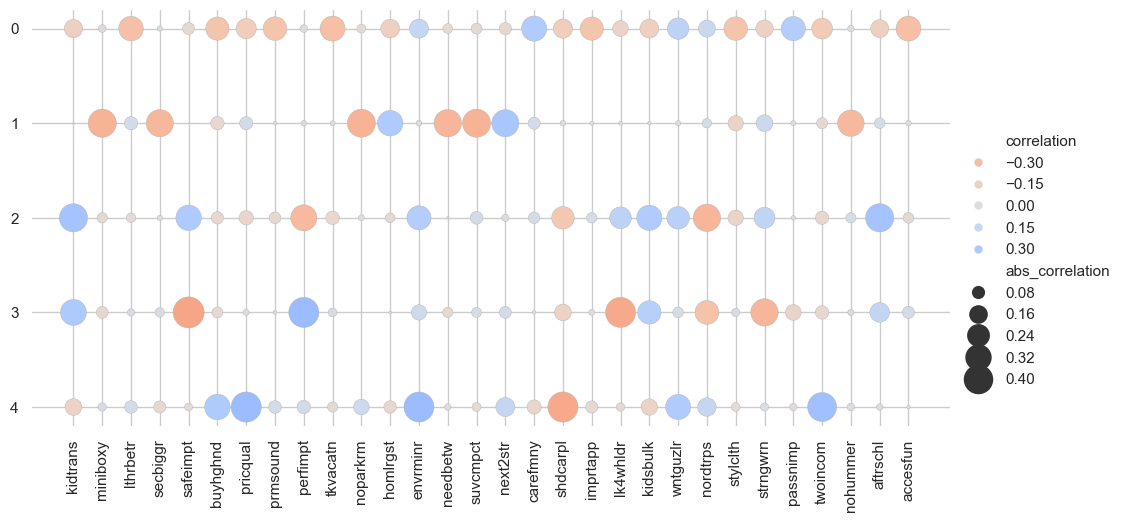

In [18]:
# Heatmap for graphic analysis of Principal Components

sns.set_theme(style="whitegrid")
heatm = sns.relplot(data=corr_mat,
    x="feature", y="component", hue="correlation", size="abs_correlation",
    palette="coolwarm_r", hue_norm=(-1,1), edgecolor=".7", height=5, aspect=2,
    sizes=(0,500),
    )

heatm.set(xlabel="", ylabel="", )
heatm.despine(left=True, bottom=True)
for i in heatm.axes.flat:
    i.set_xticklabels(i.get_xticklabels(), rotation=90)

In [31]:
data_dict["twoincom"]

'Evaluation of the necessity of more than 1 sorce of income. From 1 to 9'

<h2 style="color:cornflowerblue">Naming Components</h2>
<p> for better separation of components, each will have a specific name that better reflects on the correlation of the features</p>
<p>
    <ul type="disc">
    <li>Component 0: Vacationless Cheapskate
    <li>Component 1: Small & New
    <li>Component 2: Family Guy
    <li>Component 3: FastnFurious
    <li>Component 4: High End
    </ul></p>
<p>Naming is just an example of how to proper identify the groups of clients and their needs.</p>

<h2 style="color:cornflowerblue">PCA Storing</h2>

In [33]:
# Creating a dataframe of the Principal Components

df_PCA = pca.transform(df0.drop(dem_keys_list+["mvliking"], axis=1))

df_PCA

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315]])

<h1 style="color:cornflowerblue">Concluding</h1>
<p>PCA is a powerful tool to aggregate featrues and help simplify analysis. This project will continue in a separate project for prediction of buying the new product (vehicle).</P>